绫� 'matlab.graphics.axis.decorator.NumericRuler' 鐨勫睘鎬� 'CenterLocation' 鏃犳硶璇嗗埆銆�



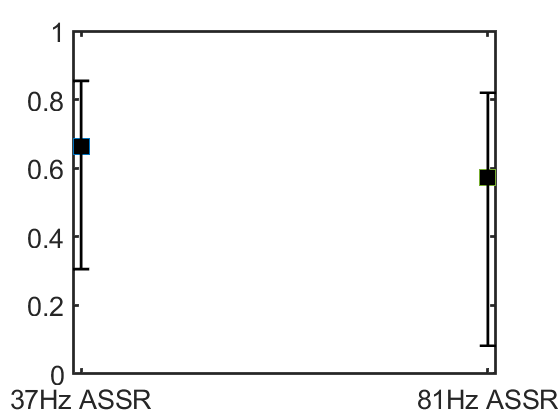

In [1]:
clc
clear
close all
tic
%%
Pathname = ['D:\dataset\健康人数据' filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3       
        Data=load( [Pathname1 filesep filename1{days} filesep 'ASSR_epoched.mat'] );
        %% 37ASSR
        Fz=6;
        %% Fz=6 cz=15 Fcz=39 Pz=24 Fpz=2
        %% 37
        x_1= mean(Data.STD_37(Fz,:,:),3);%Cztongdao
        time=linspace(-100,600,350);%时间-100 500 取300个点
        y_1=x_1;        
        Fs=500; %采样频率 f的范围是1/2Fs
        nfft = Fs;%采样点通常是5倍的Fs
        window=boxcar(0.2*Fs);%选择矩形窗和窗长
        noverlap=0.1*Fs;  %一般选择2/3的窗长
        range='onesided';  % 频率间隔为[0 Fs/2]，只计算一半的频率
        [Pxx,f]=pwelch(squeeze(y_1(76:276)),window,noverlap,nfft,Fs,range);%50-500MS
        %                 subplot(222)        %         y2=plot(f,Pxx);
        frequency_to_plot = 37; % 要画的频率为37Hz
        [~, index] = min(abs(f - frequency_to_plot)); % 查找频率向量中最接近37Hz的频率值的索引
        %% 先频谱
        ASSR_37(isSub,days,:) = squeeze(Pxx);
        f_37(isSub,days,:)=squeeze(f);
        peak_37(isSub,days)=ASSR_37(isSub,days,index);
        peak_36(isSub,days)=ASSR_37(isSub,days,index-1);
        peak_38(isSub,days)=ASSR_37(isSub,days,index+1);
        % 计算整个频谱的平均功率或能量
        
    end
end
[icc_peaks_37,LB_37P, UB_37P, F_13, df1_13, df2_13, p_13] = ICC([squeeze(peak_37(:,1)),squeeze(peak_37(:,2)),squeeze(peak_37(:,3))], 'A-k');
%% ICC 81
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3
        
        Data=load( [Pathname1 filesep filename1{days} filesep 'ASSR_epoched.mat'] );
        %% 81ASSR
        Fz=6;
        %% Fz=6 cz=15 Fcz=39 Pz=24 Fpz=2
        %% 81
        x_1= mean(Data.STD_81(Fz,:,:),3);%Cztongdao
        time=linspace(-100,600,350);%时间-100 500 取300个点
        %         h=myfilter_81;
        y_1=x_1;
        
        Fs=500; %采样频率 f的范围是1/2Fs
        nfft = Fs;%采样点通常是5倍的Fs
        window=boxcar(0.2*Fs);%选择矩形窗和窗长
        noverlap=0.1*Fs;  %一般选择2/3的窗长
        range='onesided';  % 频率间隔为[0 Fs/2]，只计算一半的频率
        [Pxx,f]=pwelch(squeeze(y_1(76:276)),window,noverlap,nfft,Fs,range);%50-500MS
        %                 subplot(222)        %         y2=plot(f,Pxx);
        frequency_to_plot = 81; % 要画的频率为81Hz
        [~, index] = min(abs(f - frequency_to_plot)); % 查找频率向量中最接近81Hz的频率值的索引        
        %% 先频谱
        ASSR_81(isSub,days,:) = squeeze(Pxx);
        f_81(isSub,days,:)=squeeze(f);
        peak_81(isSub,days)=ASSR_81(isSub,days,index);
        % 计算整个频谱的平均功率或能量        
    end
end
[icc_peaks_81,LB_81P, UB_81P, F_13, df1_13, df2_13, p_13] = ICC([squeeze(peak_81(:,1)),...
    squeeze(peak_81(:,2)),squeeze(peak_81(:,3))], 'A-k');
figure(3);
%% 37 PEAK
% 画出 ICC 的点
plot(1, icc_peaks_37, 's', 'MarkerSize', 15, 'MarkerFaceColor', 'k');
hold on;
% 画出 ICC 的上下限
plot([1, 1], [LB_37P, UB_37P], 'k-', 'LineWidth', 2); % 13
hold on;
% 在上下限终端添加短横线
plot([0.98, 1.02], [LB_37P, LB_37P], 'k-', 'LineWidth', 2); % 13 Lower Bound
hold on;
plot([0.98, 1.02], [UB_37P, UB_37P], 'k-', 'LineWidth', 2); % 13 Upper Bound
hold on;
%% 81 peak
plot(2, icc_peaks_81, 's', 'MarkerSize', 15, 'MarkerFaceColor', 'k');
hold on;
% 画出 ICC 的上下限
plot([2, 2], [LB_81P, UB_81P], 'k-', 'LineWidth', 2); % 13
hold on;
% 在上下限终端添加短横线
plot([1.98, 2.02], [LB_81P, LB_81P], 'k-', 'LineWidth', 2); % 13 Lower Bound
plot([1.98, 2.02], [UB_81P, UB_81P], 'k-', 'LineWidth', 2); % 13 Upper Bound
hold on;
xticks([ 1,2]);
xticklabels({ '37Hz ASSR','81Hz ASSR'});
set(gca, 'FontSize', 20); % 设置字体大小
ylim([0, 1]);
% 设置坐标轴线加粗
ax = gca;
ax.LineWidth = 2;
% 将坐标轴刻度居中
ax.XAxis.CenterLocation = 'origin';
ax.YAxis.CenterLocation = 'origin';
